In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = "CAISO_zone_1_2019_TimeFeatures.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])

target_column = "Load_power" 
features = data.drop(columns=['Date', target_column], errors='ignore') 
target = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

param_grid = {
    'n_estimators': [110, 120, 140],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None] 
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best negative mean squared error: {grid_search.best_score_}")

best_rf_model = grid_search.best_estimator_

y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Training R² Score: {train_r2}")
print(f"Testing Mean Squared Error (MSE): {test_mse}")
print(f"Testing R² Score: {test_r2}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}
Best negative mean squared error: -0.0021216019201758143
Training Mean Squared Error (MSE): 0.0005177368757240679
Training R² Score: 0.9725113359333598
Testing Mean Squared Error (MSE): 0.0011854328712394718
Testing R² Score: 0.9386221389171213


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = "CAISO_zone_1_2019_TimeFeatures.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])

target_column = "Load_power"  
time_column = data['Date']  
features = data.drop(columns=['Date', target_column], errors='ignore')  
target = data[target_column]

X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(
    features, target, time_column, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=140,  
    max_depth=4,  
    min_samples_split=5,  
    min_samples_leaf=3, 
    random_state=42
)

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)  
y_test_pred = rf_model.predict(X_test)  

all_features = pd.concat([X_train, X_test], axis=0)
all_target = pd.concat([y_train, y_test], axis=0)
all_time = pd.concat([time_train, time_test], axis=0)
all_pred = rf_model.predict(all_features)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
all_mse = mean_squared_error(all_target, all_pred)
all_r2 = r2_score(all_target, all_pred)

print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Training R² Score: {train_r2}")
print(f"Testing Mean Squared Error (MSE): {test_mse}")
print(f"Testing R² Score: {test_r2}")
print(f"Overall Mean Squared Error (MSE): {all_mse}")
print(f"Overall R² Score: {all_r2}")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error


train_mse = mean_squared_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred) 
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)  
test_r2 = r2_score(y_test, y_test_pred)

all_mse = mean_squared_error(all_target, all_pred)
all_mape = mean_absolute_percentage_error(all_target, all_pred)
all_mae = mean_absolute_error(all_target, all_pred)  
all_r2 = r2_score(all_target, all_pred)


print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Training Mean Absolute Percentage Error (MAPE): {train_mape}")
print(f"Training Mean Absolute Error (MAE): {train_mae}")  
print(f"Training R² Score: {train_r2}")

print(f"Testing Mean Squared Error (MSE): {test_mse}")
print(f"Testing Mean Absolute Percentage Error (MAPE): {test_mape}")
print(f"Testing Mean Absolute Error (MAE): {test_mae}")  
print(f"Testing R² Score: {test_r2}")

print(f"Overall Mean Squared Error (MSE): {all_mse}")
print(f"Overall Mean Absolute Percentage Error (MAPE): {all_mape}")
print(f"Overall Mean Absolute Error (MAE): {all_mae}")  
print(f"Overall R² Score: {all_r2}")

feature_importances = pd.DataFrame({
    "Feature": features.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances)


results = pd.DataFrame({
    "Date": all_time,  
    "Actual": all_target,
    "Predicted": all_pred
})

results = results.sort_values(by='Date')

output_file = "Random_Forest_Predictions_Time_140_4.csv"
results.to_csv(output_file, index=False)

Training Mean Squared Error (MSE): 0.0011926885724629652
Training R² Score: 0.9366755256544091
Testing Mean Squared Error (MSE): 0.0013150547137589603
Testing R² Score: 0.9319107412188701
Overall Mean Squared Error (MSE): 0.0012171618007221644
Overall R² Score: 0.9357276998061635
Training Mean Squared Error (MSE): 0.0011926885724629652
Training Mean Absolute Percentage Error (MAPE): 0.025974627818801957
Training Mean Absolute Error (MAE): 0.025302153952717323
Training R² Score: 0.9366755256544091
Testing Mean Squared Error (MSE): 0.0013150547137589603
Testing Mean Absolute Percentage Error (MAPE): 0.025081743445765685
Testing Mean Absolute Error (MAE): 0.025700713596766803
Testing R² Score: 0.9319107412188701
Overall Mean Squared Error (MSE): 0.0012171618007221644
Overall Mean Absolute Percentage Error (MAPE): 0.0257960509441947
Overall Mean Absolute Error (MAE): 0.02538186588152722
Overall R² Score: 0.9357276998061635
Feature Importances:
               Feature  Importance
9          

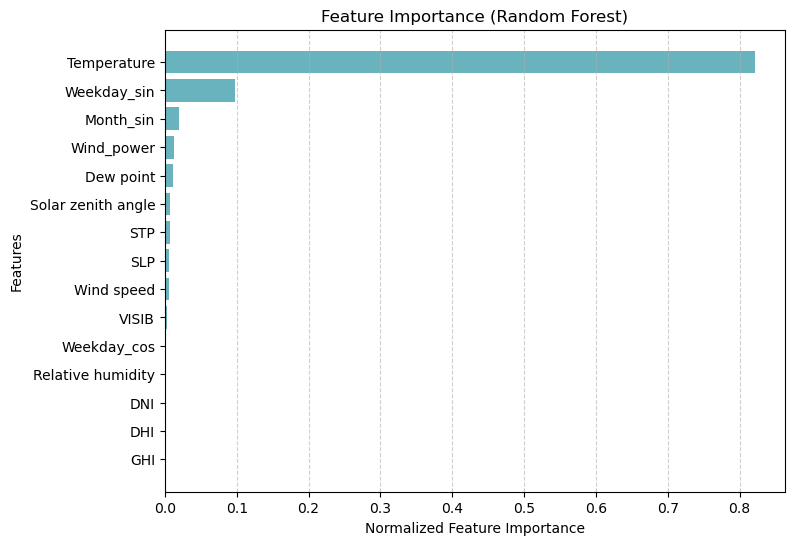

Chart has been saved to: E:/Desktop/Feature_Importance_RF.png


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.DataFrame({
    "Feature": features.columns,
    "Normalized Importance": rf_model.feature_importances_ / rf_model.feature_importances_.sum()
})

feature_importances = feature_importances.sort_values(by="Normalized Importance", ascending=True)

df_top15 = feature_importances.tail(15)

plt.figure(figsize=(8, 6))
plt.barh(df_top15["Feature"], df_top15["Normalized Importance"], color="#69b3be")
plt.xlabel("Normalized Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.grid(axis="x", linestyle="--", alpha=0.6)

output_file_path = "E:/Desktop/Feature_Importance_RF.png"
plt.savefig(output_file_path, dpi=300, bbox_inches="tight")

plt.show()

print(f"Chart has been saved to: {output_file_path}")

数据预览：
        Date    Actual  Predicted
0 2019-01-01  0.882168   0.928328
1 2019-01-02  0.995249   0.931209
2 2019-01-03  0.998937   0.931956
3 2019-01-04  0.979336   0.928718
4 2019-01-05  0.938859   0.843892
Time Series plot saved at: E:/Desktop/Actual_vs_Predicted_Over_Time_RF.png


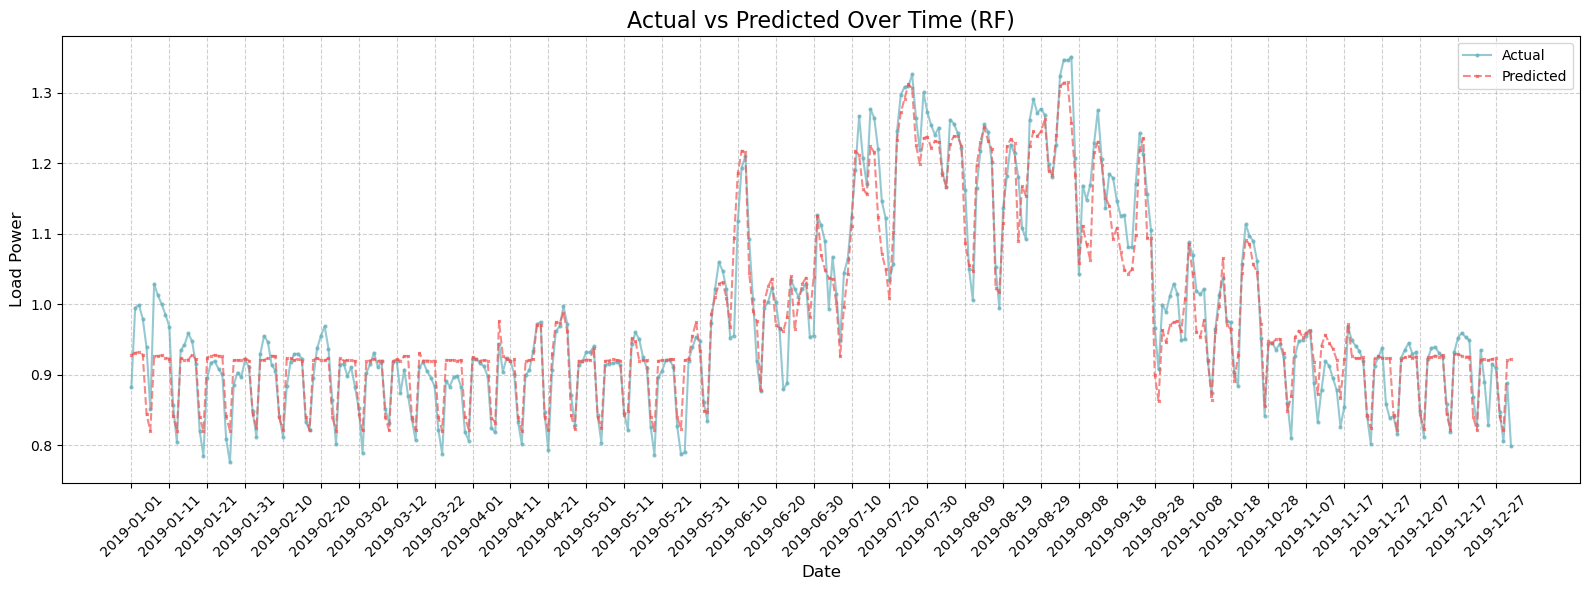

Scatter plot saved at: E:/Desktop/Scatter_Plot_Actual_vs_Predicted_RF.png


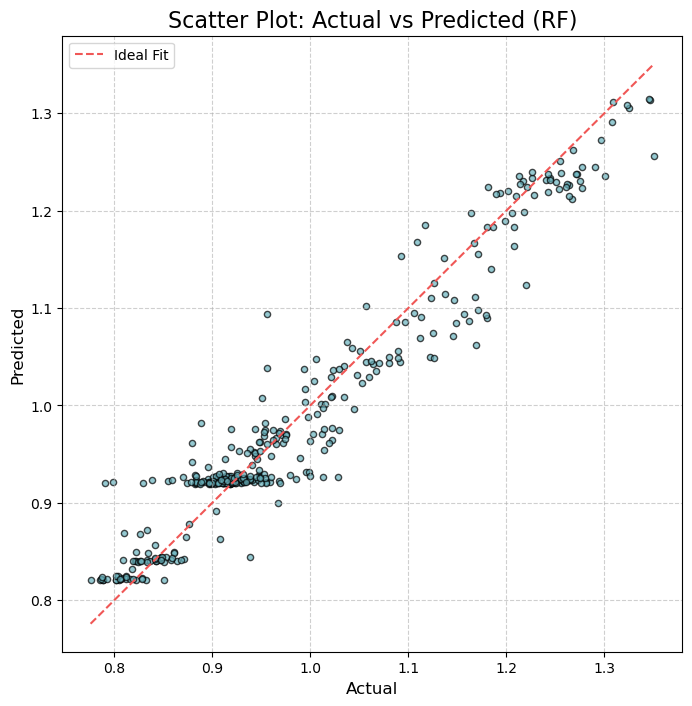

Residual plot saved at: E:/Desktop/Residual_Plot_Over_Time_RF.png


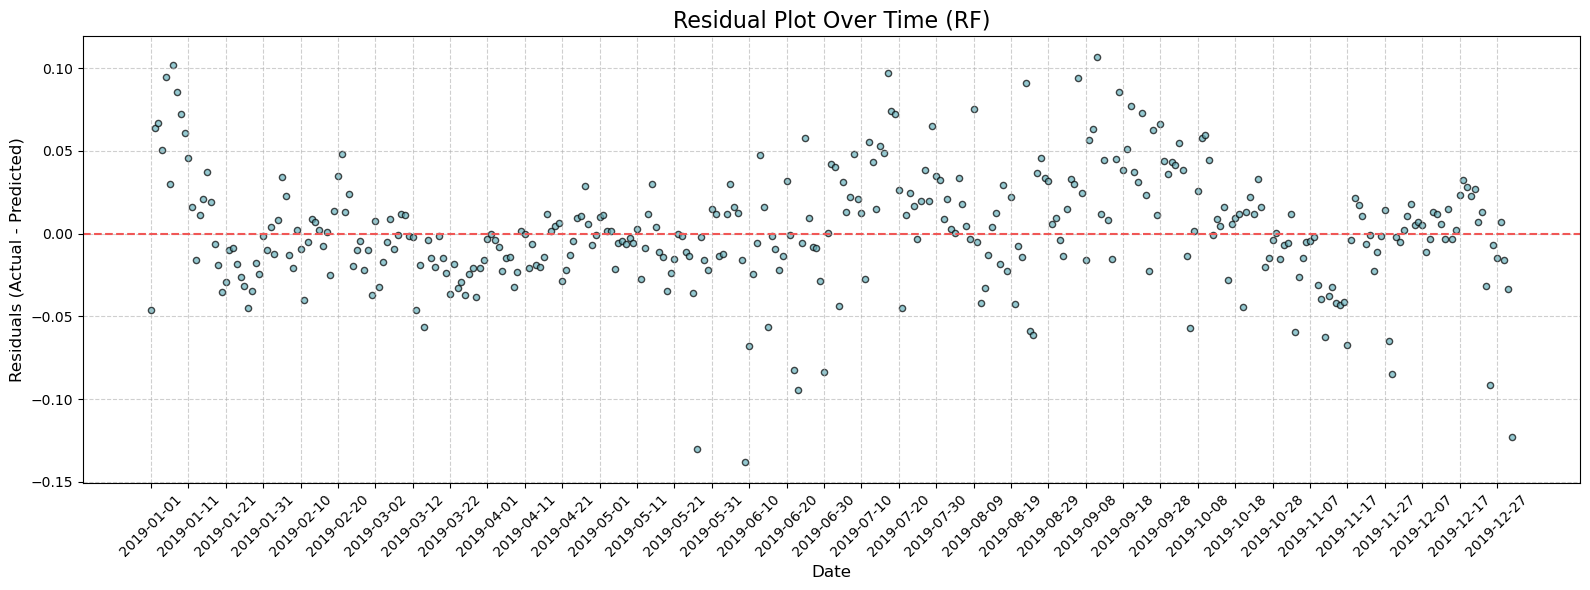

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Random_Forest_Predictions_Time_140_4.csv"

results = pd.read_csv(file_path)

if 'Date' in results.columns:
    results['Date'] = pd.to_datetime(results['Date'])

print("数据预览：")
print(results.head())

plt.figure(figsize=(16, 6))
plt.plot(results["Date"].values, results["Actual"].values, label="Actual", linestyle='-', marker='o', markersize=2, alpha=0.7,color='#69b3be')
plt.plot(results["Date"].values, results["Predicted"].values, label="Predicted", linestyle='--', marker='x', markersize=2, alpha=0.7, color='#f05756')

plt.title("Actual vs Predicted Over Time (RF)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Load Power", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(results["Date"][::10], rotation=45)  

plt.tight_layout()

output_file_path_time_series = "E:/Desktop/Actual_vs_Predicted_Over_Time_RF.png"
plt.savefig(output_file_path_time_series, dpi=300, bbox_inches='tight')
print(f"Time Series plot saved at: {output_file_path_time_series}")

plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(results["Actual"], results["Predicted"], alpha=0.7, edgecolor='k', s=20,color='#69b3be')
plt.plot(
    [results["Actual"].min(), results["Actual"].max()],
    [results["Actual"].min(), results["Actual"].max()],
    '--', label="Ideal Fit" ,color='#f05756' 
)
plt.title("Scatter Plot: Actual vs Predicted (RF)", fontsize=16)
plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

output_file_path_scatter = "E:/Desktop/Scatter_Plot_Actual_vs_Predicted_RF.png"
plt.savefig(output_file_path_scatter, dpi=300, bbox_inches='tight')
print(f"Scatter plot saved at: {output_file_path_scatter}")

plt.show()

plt.figure(figsize=(16, 6))
residuals = results["Actual"] - results["Predicted"]
plt.scatter(results["Date"].values, residuals.values, alpha=0.7, edgecolor='k', s=20,color='#69b3be')
plt.axhline(y=0, color='#f05756', linestyle='--')  
plt.title("Residual Plot Over Time (RF)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(results["Date"][::10], rotation=45) 

plt.tight_layout()

output_file_path_residual = "E:/Desktop/Residual_Plot_Over_Time_RF.png"
plt.savefig(output_file_path_residual, dpi=300, bbox_inches='tight')
print(f"Residual plot saved at: {output_file_path_residual}")

plt.show()